In [3]:
#To plot all the diagrams within the notebook
%matplotlib inline

In [4]:
import numpy as np


In [5]:
import pandas as pd

#calculate accuracy measures and confusion matrix
from sklearn import metrics

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
#from sklearn.feature_extraction.text import CountVectorizer

In [8]:
credit_df=pd.read_csv("D:\Machine Learning\Machine Learning Projects\Credit (Decision Tree)\credit.csv")

In [9]:
#Statistical table
credit_df.describe().transpose()#basic statistics for the column--> To understand outliers & long tails on the data sets,to find wherther the data is skewed or normal! etc

#some of the column's are missing in the statistical table

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
credit_df.head(10)

#since many of the below column's values are of non numerical type ,so it is not shown in the statistical table above

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [11]:
credit_df.shape #rows=1000,columns=17

(1000, 17)

In [12]:
credit_df.describe(include=[np.number]) #include--> to include all the columns in the described statement(it will give the descriptive statistics of all the numerical columns & the data set)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [13]:
credit_df.info()#info-it gives the structure of the data frame

#many columns are of the type object,i.e. strings. These need to be converted to a numerics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [14]:
# Decision tree in python can take only nemerical/categorical columns .It cannot take string/object
# The following code loops through each column and checks if the column type is object, then converts those...
#... into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # loop through all columns in the data frame
    if credit_df[feature].dtype=='object': # only apply for columns with categorical strings
        credit_df[feature]= pd.Categorical(credit_df[feature]).codes # Replace strings with an integers

In [15]:
#again checking the structure of the data frame
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

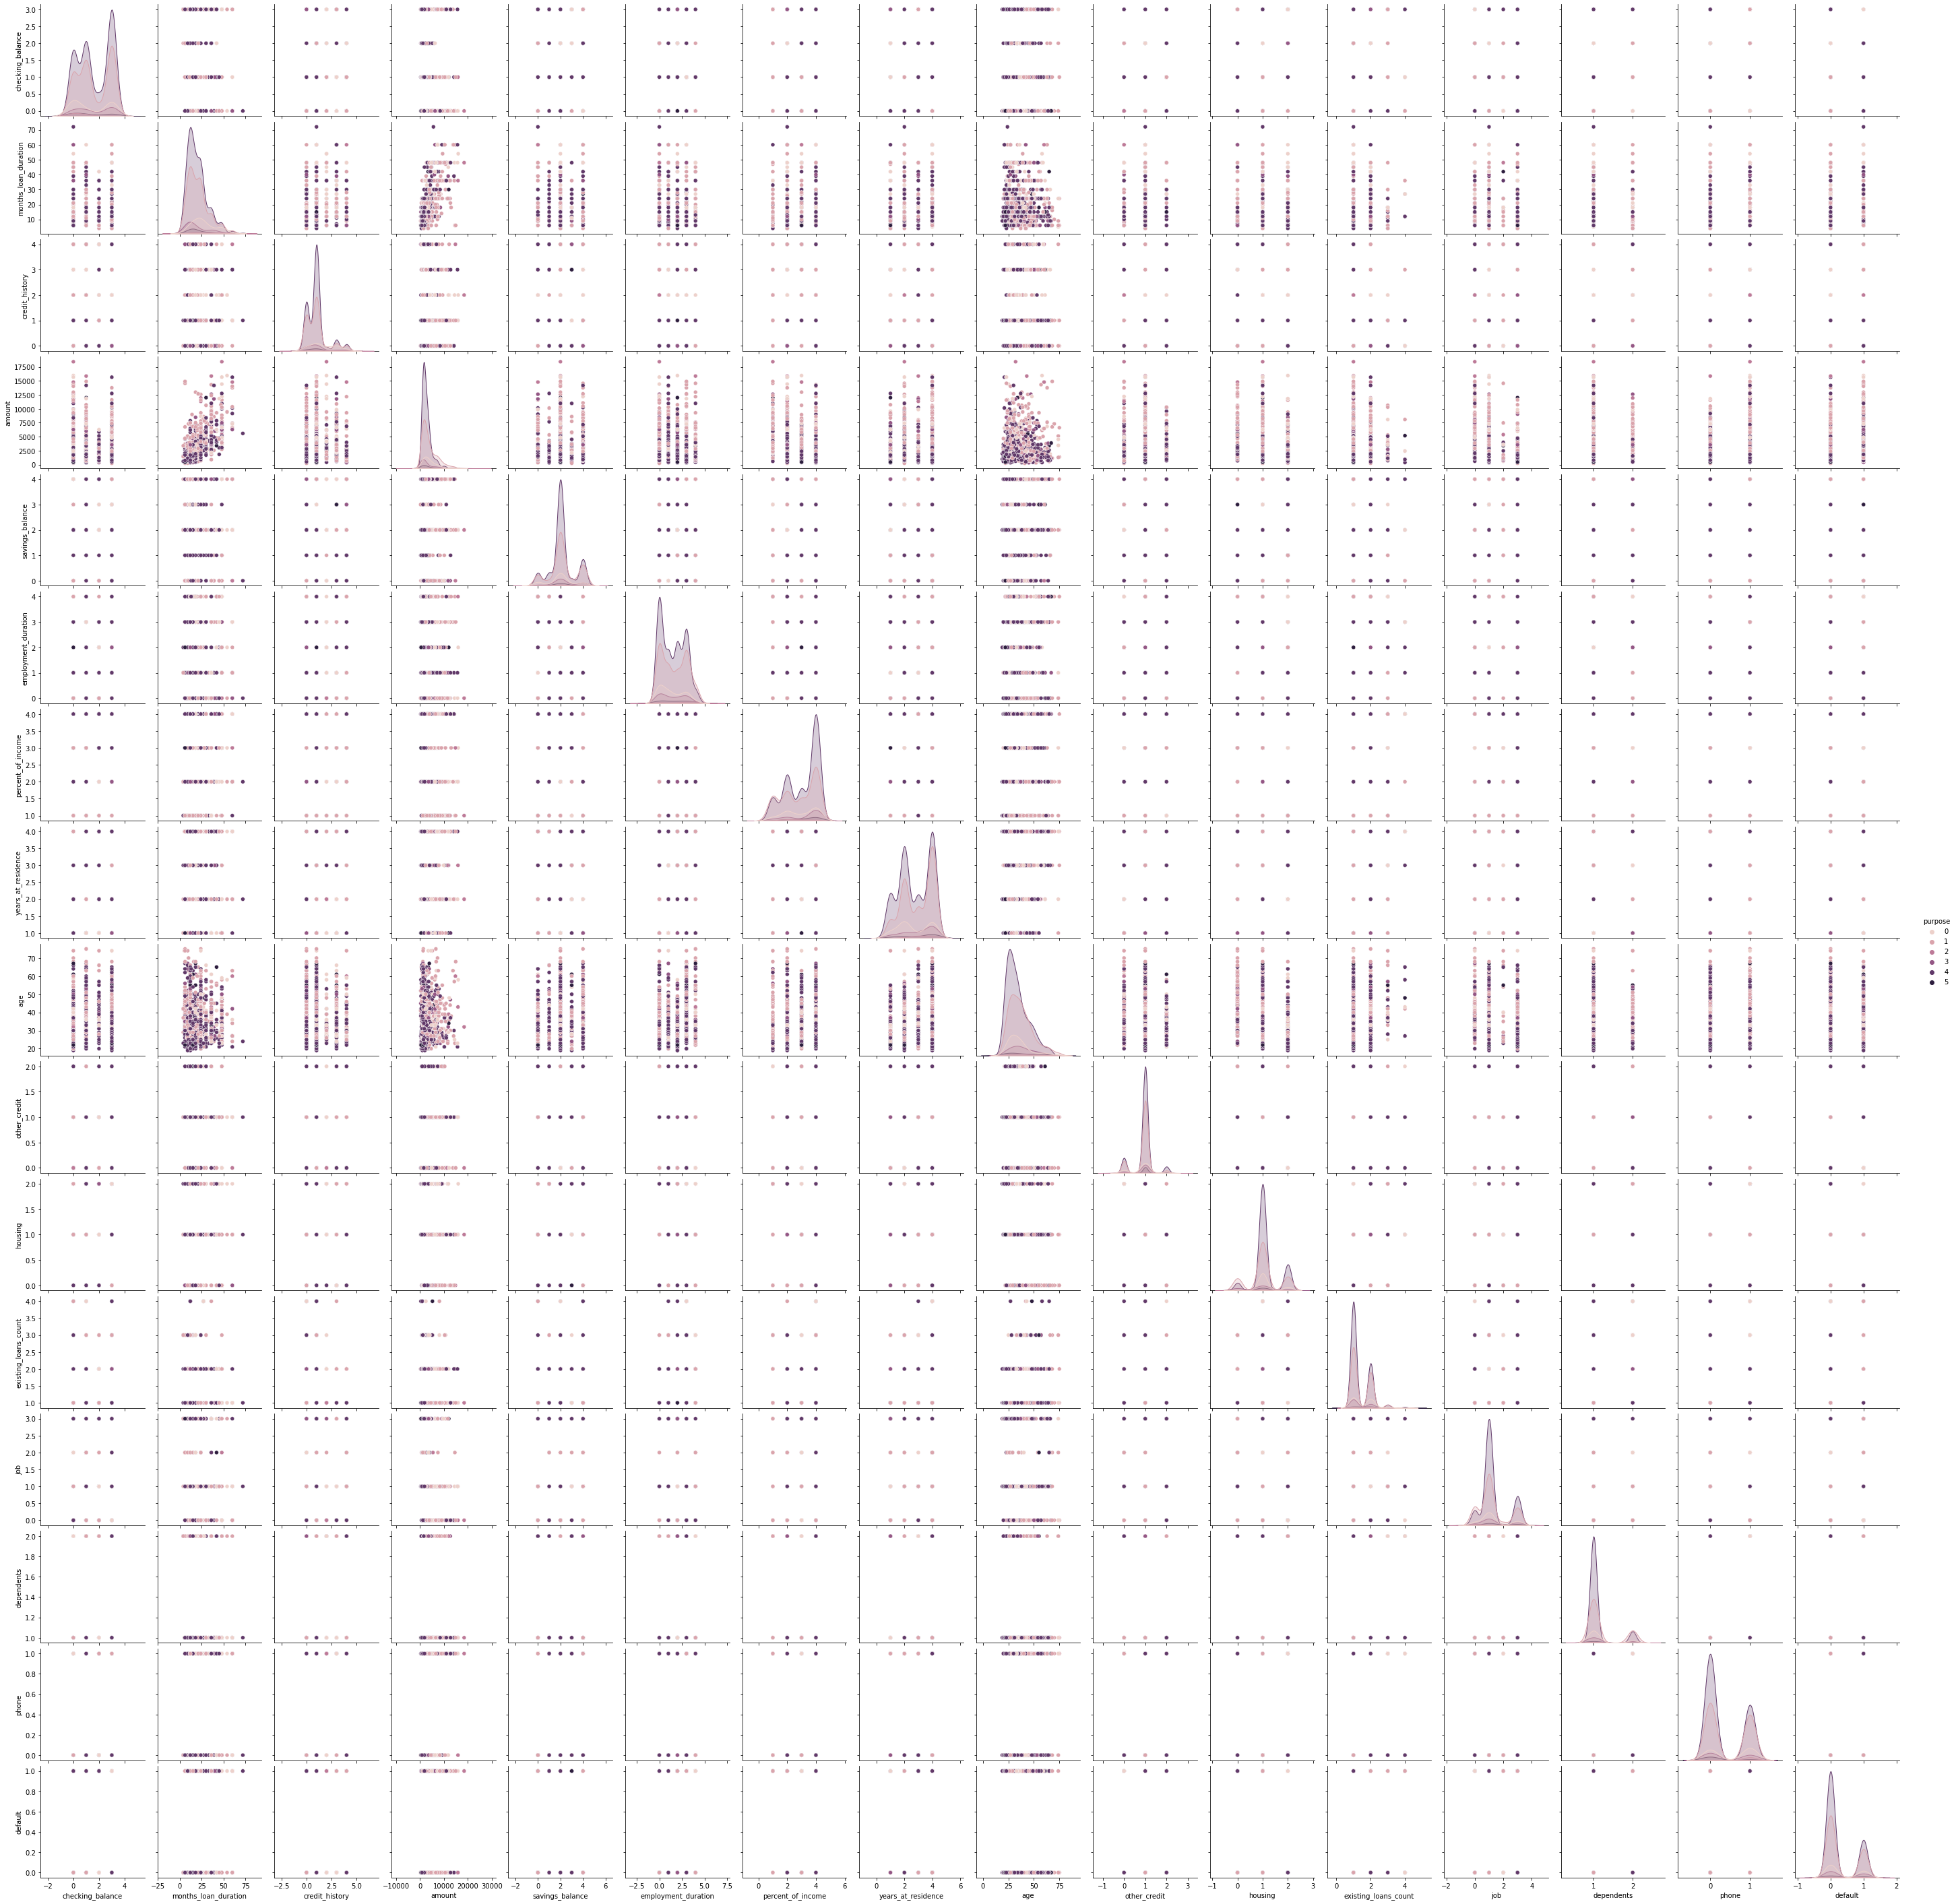

In [16]:
# To understand how the data is distributed on the various columns ,use seaborn library
#pairplot using sns
import seaborn as sns
sns.pairplot(credit_df,hue="purpose")

#in the diagonal of the pairplot we can found most of the datas are not distributed like a normal curve and having long tails on left and right side

In [17]:
# Storing the column names separately in an array
col_labels = ['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
              'amount','savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence',
              'age','other_credit', 'housing','existing_loans_count','job','dependents','phone','default' ]
              


In [18]:
#storing the defaulter datatypes(dependent variable) into a separate array
train_char_label=['No','Yes']


In [19]:
# capture the target column ("default") into separate vectors for training set and test set

X= credit_df.drop("default", axis=1) # droping the dependent varaible and capturing all the independent variable

y=credit_df.pop("default") # capturing only the target /dependent column and storing in y

In [20]:
#splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_train,X_test,train_labels,test_labels= train_test_split(X,y,test_size=.30,random_state=1)


In [21]:
#invoking the decision tree classifier function.Using 'entropy' method of finding the split columns
#can use gini index also. Restricting the depth of the tree to 5(no particular reason for selecting this depth =5)
#dt_model =DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=100)

dt_model=DecisionTreeClassifier(criterion='entropy') #since we didn't use any regularization parameters like max_depth here,this decision tree will going to be 'overfit'.


In [22]:
#fit function
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(criterion='entropy')

In [23]:
print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],index=X_train.columns)) # To see the importance of the ....
#....various attributes that the Decision Tree algorithm used to break our data into a tree structure.

                           Imp
checking_balance      0.131980
months_loan_duration  0.074015
credit_history        0.052571
purpose               0.060128
amount                0.208787
savings_balance       0.079123
employment_duration   0.047511
percent_of_income     0.034995
years_at_residence    0.036389
age                   0.116130
other_credit          0.045786
housing               0.013220
existing_loans_count  0.024294
job                   0.038567
dependents            0.030599
phone                 0.005906


In [24]:
# Since scikit learn does not print the decision tree by default,we need to print it

from IPython.display import Image #(IPython.display->library, Image->function)
#import pydotplus as pydot
from sklearn import tree
from os import system # to make system level calls

Credit_Tree_File=open('d:\credit_tree.dot','w') #open a file for write
dot_data=tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names=list(X_train), class_names=list(train_char_label))
#tree.export_graphviz--> It takes our model,convert into an object and stores in the file(credit_tree.dot)

Credit_Tree_File.close()


In [25]:
# Making use of system level command

# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get the tree viewer...
#... or create a .png as below

#**Have to install the dot function in the computer**,then the 2 below code will work
#system("dot -Tpng D:\credit_tree.dot -o D:/credit_tree.png")
#Image("d:\credit_tree.png")#("d:\credit_tree.png")

#have seen the visualization of this decison tree by copying the credit_tree source (.file) and pasting in the http://webgraphviz.com/ 
# The tree obtained is "overfit" ,because most of the leaf level has "only one record".

In [26]:
y_predict=dt_model.predict(X_test)

In [27]:
#running the overfit tree in both the training and test data

print(dt_model.score(X_train,train_labels))#the training set gives 100% accuracy because the decision tree is based on the training set
print(dt_model.score(X_test,test_labels))#but it performs very poor on the test set

#This is an example of an overfit case ,where the model performs well on the training set and performs poor on the test set

1.0
0.6533333333333333


In [28]:
#confusion matrix

print(metrics.confusion_matrix(test_labels,y_predict))

#here no. of non defaulters(1st row) = 161+53=214  , and the model predicted non defaulter(1st column)=161,wrong prediction=53
# no. of defaulter(2nd row)=51+35=86 , and the model predicted defaulters(2nd column)=35,wrong prediction=51

[[161  53]
 [ 51  35]]


In [29]:
# Look at the class level metric for the defaulter class. It is very poor.
#since the model prediction is very poor,we can" regularize the Decision Tree".

In [30]:
# Regularising the Decision Tree
# here using regularising parameter is max_depth

reg_dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [31]:
credit_tree_regularized=open('d:\credit_tree_regularized.dot','w') #open a file for write
dot_data=tree.export_graphviz(reg_dt_model, out_file=credit_tree_regularized, feature_names=list(X_train), class_names=list(train_char_label))
#tree.export_graphviz--> It takes our model,convert into an object and stores in the file(credit_tree_regularized.dot)

credit_tree_regularized.close()

print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],index=X_train.columns))

                           Imp
checking_balance      0.131980
months_loan_duration  0.074015
credit_history        0.052571
purpose               0.060128
amount                0.208787
savings_balance       0.079123
employment_duration   0.047511
percent_of_income     0.034995
years_at_residence    0.036389
age                   0.116130
other_credit          0.045786
housing               0.013220
existing_loans_count  0.024294
job                   0.038567
dependents            0.030599
phone                 0.005906


In [32]:
#Visualizing the Decision Tree 
#by using http://webgraphviz.com/ and credit_tree_regularized(.file)

#After visualizing the Decision Tree ,"the structure of tree is found to be symmetric"
#And most of "leaf level have record more than 1 and upto 103",so it is" not overfit".

In [35]:
y_predict=reg_dt_model.predict(X_test)

In [36]:
print(reg_dt_model.score(X_train,train_labels))
print(reg_dt_model.score(X_test,test_labels))

#**here the model performed good on both the training set & test set**
#and the performance percentage of both the" training & test set has very less difference"

0.7885714285714286
0.7533333333333333


In [39]:
# Confusion Matrix

print(metrics.confusion_matrix(test_labels,y_predict))


# here,non defaulters(1st row)=196+18=214 ,  model predicted non defaulters(1st column)=196 ,wrong prediction=18
#here, defaulters(2nd row)=56+30=86 , model predicted defaulters(2nd column)=30, wrong prediction=56


[[196  18]
 [ 56  30]]


In [ ]:
# ***always divide the data into three subsets for regularization,i.e "training,validation,testing"***
#** do not use test data for hyperparameters tuning,instead "use validation data for hyperparameters evaluation"**. 
